### Analyysejä analysointiosaamisen tehtävään 2

In [1]:
# Kirjastojen tuonti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kaavioiden tyylimäärittely
plt.style.use('seaborn-whitegrid')

# Datan avaaminen
df=pd.read_excel('t2aineisto.xlsx')
df.head()

,Rahaston nimi,5 vuoden tuotto (% vuodessa),3 vuoden tuotto (% vuodessa),1 vuoden tuotto,6 kuukauden tuotto,Hallinn. ja säilytyspalkkio (% vuodessa),Rahastoluokka
0,Aktia Capital,0.065401,0.060454,-0.229771,0.006839,0.0183,EQ_FINLAND
1,Aktia Capital K,NaN,NaN,-0.224915,0.009948,0.0120,EQ_FINLAND
2,Aktia Capital L,NaN,NaN,-0.224918,0.009937,0.0120,EQ_FINLAND
3,Aktia Capital X,NaN,NaN,-0.222772,0.011337,0.0093,EQ_FINLAND
4,Aktia Mikro Markka A,0.081398,0.060095,-0.370648,-0.127992,0.0120,EQ_FINLAND


In [2]:
df.columns

Index(['Rahaston nimi', '5 vuoden tuotto (% vuodessa)',
       '3 vuoden tuotto (% vuodessa)', '1 vuoden tuotto', '6 kuukauden tuotto',
       'Hallinn. ja säilytyspalkkio (% vuodessa)', 'Rahastoluokka'],
      dtype='object')

In [3]:
# Lyhyemmät nimet muuttujille
df.columns=['nimi', 'tuotto 5v', 'tuotto 3v', 'tuotto 1v', 'tuotto 6kk', 'palkkio', 'rahastoluokka']

In [4]:
# Rastojen lukumäärä rahastoluokittain
df['rahastoluokka'].value_counts()

EQ_EUROPE         127
EQ_NORAM           83
EQ_EMER_GLOBAL     63
EQ_FINLAND         37
Name: rahastoluokka, dtype: int64

In [5]:
#Tilastolliset tunnusluvut rahastoluokittain
df.groupby('rahastoluokka').describe().T

rahastoluokka     EQ_EMER_GLOBAL   EQ_EUROPE  EQ_FINLAND   EQ_NORAM
tuotto 5v  count       51.000000   93.000000   28.000000  60.000000
           mean         0.001276    0.025227    0.068351   0.095040
           std          0.029675    0.030198    0.015335   0.027399
           min         -0.071745   -0.063587    0.029071  -0.010056
           25%         -0.014425    0.011425    0.056846   0.081770
           50%         -0.000647    0.031050    0.068480   0.103153
           75%          0.015462    0.042098    0.080226   0.109622
           max          0.099699    0.090302    0.095851   0.152595
tuotto 3v  count       55.000000  103.000000   34.000000  66.000000
           mean        -0.021913    0.009438    0.062187   0.072710
           std          0.049479    0.038277    0.019362   0.030892
           min         -0.137305   -0.127024    0.020588  -0.050488
           25%         -0.039268   -0.008607    0.053245   0.062834
           50%         -0.024722    0.019951    0.062349   0.083735
           75%         -0.003978    0.031833    0.076007   0.089047
           max          0.173810    0.107103    0.103661   0.123601
tuotto 1v  count       59.000000  121.000000   37.000000  78.000000
           mean        -0.193809   -0.187582   -0.186794  -0.140579
           std          0.079009    0.145953    0.072909   0.072228
           min         -0.496001   -0.994597   -0.370648  -0.306473
           25%         -0.238942   -0.221897   -0.224915  -0.180206
           50%         -0.182127   -0.137104   -0.154608  -0.147695
           75%         -0.152457   -0.107463   -0.136793  -0.100687
           max         -0.042774   -0.017639   -0.088371   0.074015
tuotto 6kk count       61.000000  125.000000   37.000000  77.000000
           mean        -0.041024    0.024744    0.027254   0.004003
           std          0.046184    0.054514    0.054582   0.031518
           min         -0.134936   -0.129335   -0.127992  -0.077350
           25%         -0.061756    0.005284    0.009948  -0.012168
           50%         -0.050670    0.040511    0.050965  -0.001233
           75%         -0.036743    0.058841    0.065113   0.023609
           max          0.159889    0.104379    0.091282   0.091372
palkkio    count       63.000000  127.000000   37.000000  83.000000
           mean         0.014208    0.011564    0.011693   0.011092
           std          0.007117    0.005864    0.006072   0.006067
           min          0.000000    0.000000    0.001590   0.000000
           25%          0.008000    0.007500    0.006200   0.006000
           50%          0.015000    0.011600    0.012000   0.010000
           75%          0.019000    0.017150    0.017000   0.016000
           max          0.025000    0.020000    0.020000   0.020000

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 5v'>

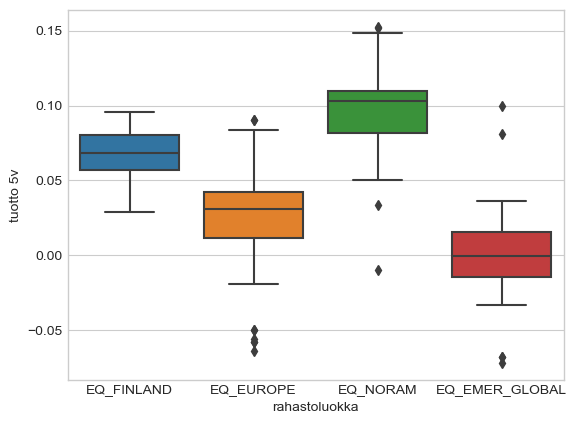

In [6]:
sns.boxplot(x='rahastoluokka', y='tuotto 5v', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 3v'>

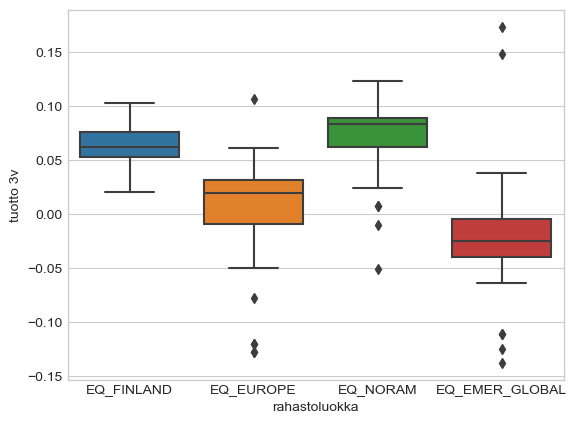

In [7]:
sns.boxplot(x='rahastoluokka', y='tuotto 3v', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 1v'>

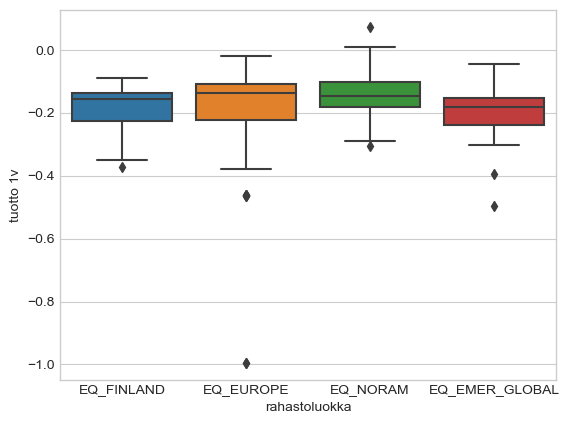

In [8]:
sns.boxplot(x='rahastoluokka', y='tuotto 1v', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 6kk'>

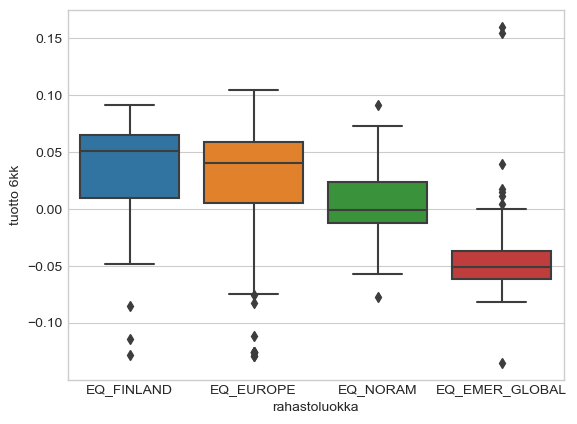

In [9]:
sns.boxplot(x='rahastoluokka', y='tuotto 6kk', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='palkkio'>

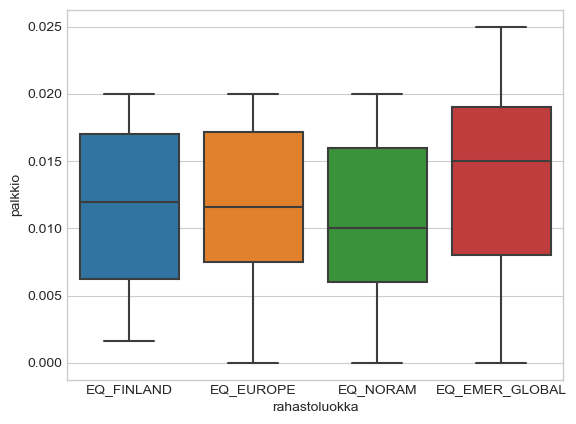

In [10]:
sns.boxplot(x='rahastoluokka', y='palkkio', data=df)

In [11]:
# Korrelaatiokertoimen 1v tuoton ja palkkion välille rahastoluokittain
df.groupby('rahastoluokka')[['tuotto 1v','palkkio']].corr()

tuotto 1v   palkkio
rahastoluokka                                
EQ_EMER_GLOBAL tuotto 1v   1.000000  0.032505
               palkkio     0.032505  1.000000
EQ_EUROPE      tuotto 1v   1.000000 -0.178596
               palkkio    -0.178596  1.000000
EQ_FINLAND     tuotto 1v   1.000000 -0.524798
               palkkio    -0.524798  1.000000
EQ_NORAM       tuotto 1v   1.000000 -0.066358
               palkkio    -0.066358  1.000000

In [12]:
# pearsonr-funktion tuonti scipy.stats-kirjastosta
from scipy.stats import pearsonr

# Korrelaatiokertoimet ja p-arvot 1v tuoton ja palkkion välille rahastoluokittain
for luokka in pd.unique(df['rahastoluokka']):
    df_dropna = df[df['rahastoluokka']==luokka].dropna(subset=['tuotto 1v', 'palkkio'])
    corr, p = pearsonr(df_dropna['tuotto 1v'], df_dropna['palkkio'])
    print(luokka, 'korrelaatio %.3f,' %corr, 'p-arvo %.4f' %p)

EQ_FINLAND korrelaatio -0.525, p-arvo 0.0009
EQ_EUROPE korrelaatio -0.179, p-arvo 0.0500
EQ_NORAM korrelaatio -0.066, p-arvo 0.5638
EQ_EMER_GLOBAL korrelaatio 0.033, p-arvo 0.8069


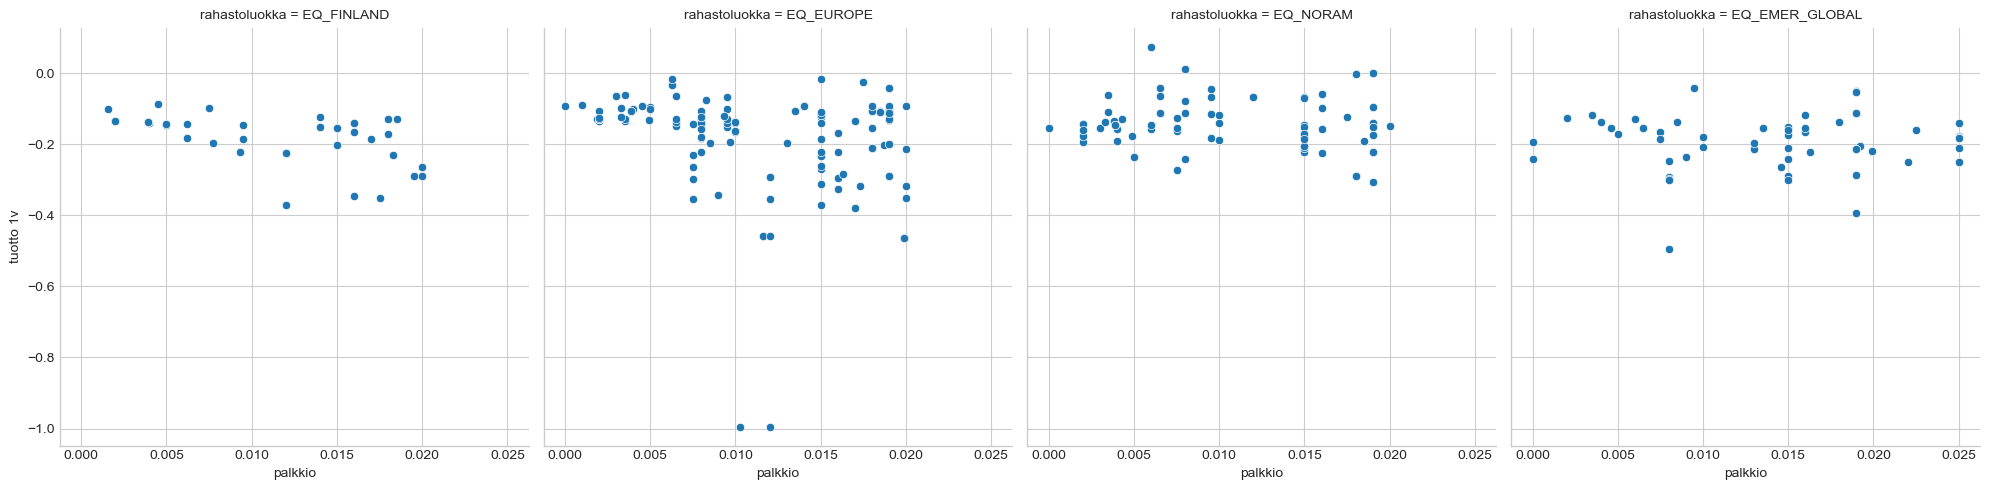

In [13]:
sns.relplot(x='palkkio', y='tuotto 1v', col='rahastoluokka', data=df, kind='scatter')